In [2]:
import os
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/Danny/anaconda3/envs/bayota36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
pathstem = '/Users/Danny/temp_bayota_out_2018102312/from_aws/MDcounties_loadred'
filenames = ['output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_003736.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_004033.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_004213.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_004646.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_004955.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_005242.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_005525.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_010335.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_010708.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_011143.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_011349.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_011817.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_012055.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_013436.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_013916.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_014611.csv',
'output_study_loadreductionmax_countycostboundsequence19_costbound1900000_2018-10-24_015532.csv']
countynames = ['Allegany, MD',
                      'Anne Arundel, MD',
                      'Baltimore City, MD',
                      'Calvert, MD',
                      'Caroline, MD',
                      'Carroll, MD',
                      'Cecil, MD',
                      'Charles, MD',
                      'Dorchester, MD',
                      'Frederick, MD',
                      'Garrett, MD',
                      'Harford, MD',
                      'Howard, MD',
                      'Kent, MD',
                      'Montgomery, MD',
                      'Prince Georges, MD',
                      'Queen Annes, MD']
df_list = []
for f, c in zip(filenames, countynames):
    df_temp = pd.read_csv(os.path.join(pathstem, f))
    df_temp['id'] = c
    df_list.append(df_temp)

In [14]:
df = pd.concat(df_list)

In [15]:
feasibledf = df[df['feasible'] == True]

grouped = feasibledf.groupby(['id', 'totalcostupperbound'])

In [16]:
new = grouped['solution_objectives'].mean()
cost1pt9mildf = pd.DataFrame(new[new.index.get_level_values('totalcostupperbound')==1900000])
cost1pt9mildf = cost1pt9mildf.reset_index()

# infeasible costmin solutions show up as 0.00 in load red max
cost1pt9mildf = cost1pt9mildf[cost1pt9mildf['solution_objectives'] != 0.00]

cost1pt9mildf.head(5)

,id,totalcostupperbound,solution_objectives
0,"Allegany, MD",1900000,14.760919
2,"Baltimore City, MD",1900000,74.803569
3,"Calvert, MD",1900000,33.765431
4,"Caroline, MD",1900000,26.309530
5,"Carroll, MD",1900000,30.233370


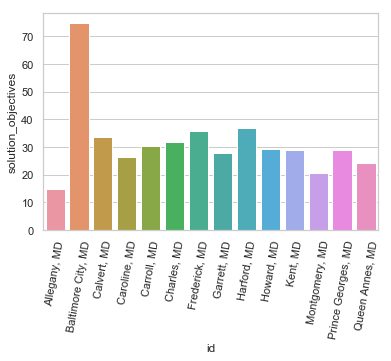

In [17]:
sns.set(style="whitegrid")
ax = sns.barplot(x="id", y="solution_objectives", data=cost1pt9mildf)
for item in ax.get_xticklabels():
    item.set_rotation(80)
plt.savefig('bar_costbound.png', dpi=500, bbox_inches='tight')